In [44]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/2d_pdes.jl");
include("/home/jm2386/Active_Lattice/src/2d_sims.jl");
include("/home/jm2386/Active_Lattice/src/2d_plot.jl");

v1.0
v1.1


v2.2


In [78]:
Params = []
DT, DR, N, Nθ, Δx, Lx, Ly, δt, δ, ϕa, ϕp = (1.0, 1.0, 32, 20, 0.1, 20.0, 20.0, 1e-5, 0.2, 0.45, 0.0);
T, save_interval, param_name = (0.2, 0.0001, "test")
map([10.]) do v0
    param = _2d_new_param(DT, v0, DR, N, Nθ, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true, pert = "not_rand")
    push!(Params,param)
end
param = Params[1]
values = map(lin_pert_values,Params)

1-element Vector{Tuple{ComplexF64, Vector{ComplexF64}}}:
 (0.034520642317804474 + 0.0im, [0.0 + 0.0im, 0.9880339492718292 + 0.0im, 0.0 + 0.15235191852809749im, 0.02397672702148765 + 0.0im, 0.0 - 0.0017087485073291123im, -6.887542507434189e-5 + 0.0im, 0.0 + 1.7807956877288578e-6im, 3.201095760305042e-8 + 0.0im, -0.0 - 4.230339561539493e-10im, -4.28200314937191e-12 + 0.0im, -0.0 + 3.4257522809909054e-14im])

In [79]:
# param = Params[1]
# ts, fs = load_compress_pde(param);
# i=0
# t,f = ts[end],fs[end]
@unpack DT, v0, DR, Δx, Lx, ϕa, ϕp, T , name, Nx, Nθ, save_interval, save_on, δt, pert = param
        # configuration
        f = initiate_uniform_pde(ϕa, ϕp, Nx, Nθ);
        f = perturb_pde!(f, param; type = pert);

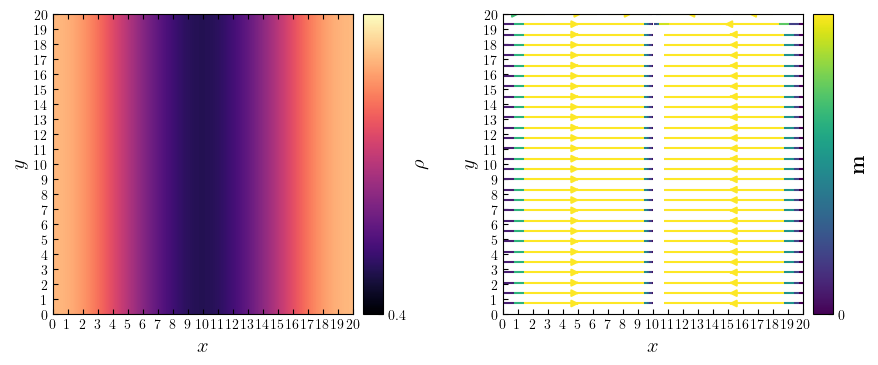

v2.2


In [83]:
# i += 1
# t,f = ts[i],fs[i]
# t,f = ts[end],fs[end]
include("/home/jm2386/Active_Lattice/src/2d_plot.jl");
# create fig
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig = plt.figure(figsize=(10,5))
# add image
    ax      = fig.add_axes([0.1, 0.1, 0.3, 0.6])
    cbar_ax = fig.add_axes([0.41, 0.1, 0.02, 0.6])
    plot_pde_rho(ax, cbar_ax, param, f; cmin = 0.4, cmax = 0.5, cbar = true)
    ax      = fig.add_axes([0.55, 0.1, 0.3, 0.6])
    cbar_ax = fig.add_axes([0.86, 0.1, 0.02, 0.6])
    plot_pde_mag(ax, cbar_ax, param, f; cmin = 0.0, cmax = 0.001, cbar = true, density = 1.0)
#
display(fig)

In [89]:
x_gape= 20:20:200
ρ_f(f; Nx=Nx, Nθ=Nθ )[x_gape,1], mag_f(f; Nx=Nx, Nθ=Nθ )[1,x_gape,1]

 

([0.47850576997539085, 0.460888235255113, 0.4391117647448869, 0.4214942300246092, 0.4147649305594444, 0.4214942300246092, 0.4391117647448869, 0.460888235255113, 0.47850576997539085, 0.48523506944055567], [0.0015967608707782195, 0.0025836133608250237, 0.0025836133608250584, 0.001596760870778215, -1.743934249004316e-17, -0.0015967608707782282, -0.0025836133608250584, -0.0025836133608250498, -0.0015967608707782455, -3.051884935757553e-17])

In [96]:
real(im*exp.((1:Nx)*(im*2*π/Nx)))

k = 2
            value, vector = lin_pert_values(param; k = k)
            
            wave::Vector{ComplexF64}   = exp.((1:Nx)*(im*2*π/Nx))

            K = collect(0:1:(k-1))

            vector[3]

-0.0 + 0.16481751071754147im

In [97]:
pertf   = zeros(Nx,Nx,Nθ+1)
for x in 1:Nx, y in 1:Nx
    pertf[x,y, 1] = real(vector[1]*wave[x])
    for θ in 1:Nθ
        pertf[x,y,θ+1] = real( dot(vector[2:1:end],cos.(θ*K*(2*π/Nθ)))*wave[x] )
    end
end

In [100]:
x = 10
real( dot(vector[2:1:end],cos.(θ*K*(2*π/Nθ)))*wave[x] ), real( (vector[2]+vector[3]*cos.(θ*(2*π/Nθ)) )*wave[x] )

(0.986488593255965, 0.8896112911366376)

In [98]:
mag_f(pertf; Nx=Nx, Nθ=Nθ )[1,x_gape,1]

10-element Vector{Float64}:
  0.3043490206376781
  0.49244705983450643
  0.49244705983450626
  0.30434902063767844
  1.0463605494025895e-16
 -0.3043490206376779
 -0.49244705983450643
 -0.49244705983450665
 -0.30434902063767844
 -1.0463605494025895e-16

In [7]:
using PyCall
@pyimport matplotlib.animation as anim

fig = plt.figure(figsize=(10,5))
@unpack save_interval = param
scale_factor = 1
interval  = save_interval*scale_factor*1000
frames    = Int64( length(ts)/scale_factor ÷ 1)
function makeframe(i)
        clf()
        t, f = ts[i+1], fs[i+1]
        # add image
                ax      = fig.add_axes([0.1, 0.1, 0.3, 0.6])
                cbar_ax = fig.add_axes([0.41, 0.1, 0.02, 0.6])
                plot_pde_rho(ax, cbar_ax, param, f; cmin = 0.0, cmax = 1.0, cbar = true)
                ax      = fig.add_axes([0.55, 0.1, 0.3, 0.6])
                cbar_ax = fig.add_axes([0.86, 0.1, 0.02, 0.6])
                plot_pde_mag(ax, cbar_ax, param, f; cmin = -0.4, cmax = 0.4, cbar = true, density = 0.5)
        #
        return fig
end
myanim = anim.FuncAnimation(fig, makeframe, frames=frames, interval=interval)
# Convert it to an MP4 movie file and saved on disk in this format.
        filename, pathname = pde_vid_save_name(param,ts[end])
        mkpath(pathname)
        myanim[:save](filename, bitrate=-1, dpi= 100, extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])